In [1]:
import matplotlib.pyplot as plt
import scanpy as sc

# Load the file
adata = sc.read_h5ad("data/dataset.h5ad")
adata = adata[adata.obs['cell_type'] == "glutamatergic neuron"].copy()

# As I dont have enough RAM, save this file first
adata.write("data/dataset_glutamatergic.h5ad")

In [1]:
import scanpy as sc

# Load the file
adata = sc.read_h5ad("data/dataset_glutamatergic.h5ad")
adata = adata[adata.obs['disease'] == "normal"].copy()

adata.write("data/dataset_healthy_glutamatergic.h5ad")

In [2]:
import scanpy as sc

# Load the file
adata = sc.read_h5ad("data/dataset_healthy_glutamatergic.h5ad")

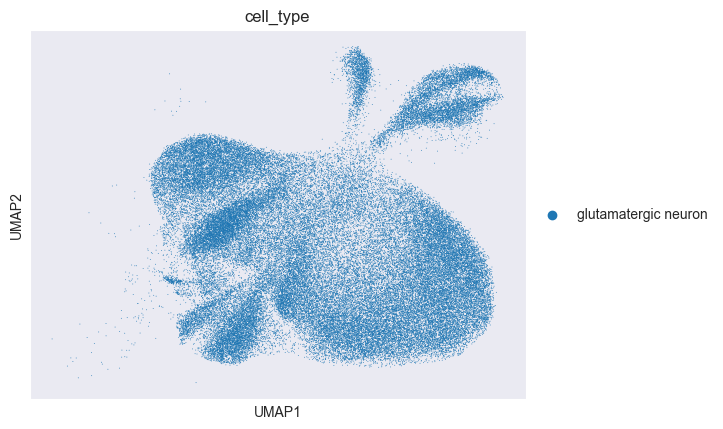

In [3]:
# Plot the cell population based on cell type
sc.pl.umap(adata, color=['cell_type'])

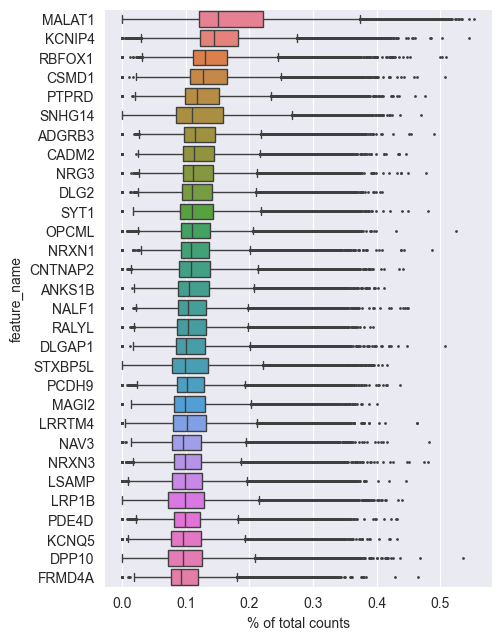

In [5]:
genes = sc.pl.highest_expr_genes(adata, gene_symbols="feature_name")

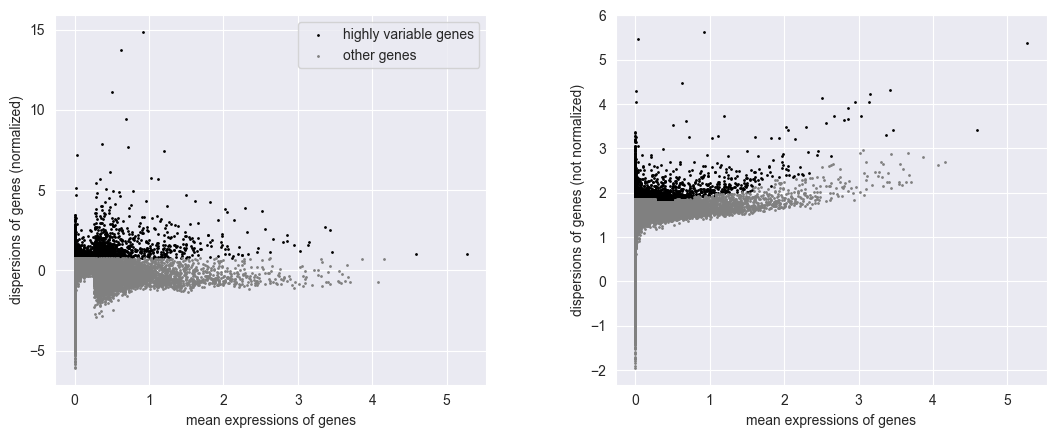

In [6]:
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
sc.pl.highly_variable_genes(adata)

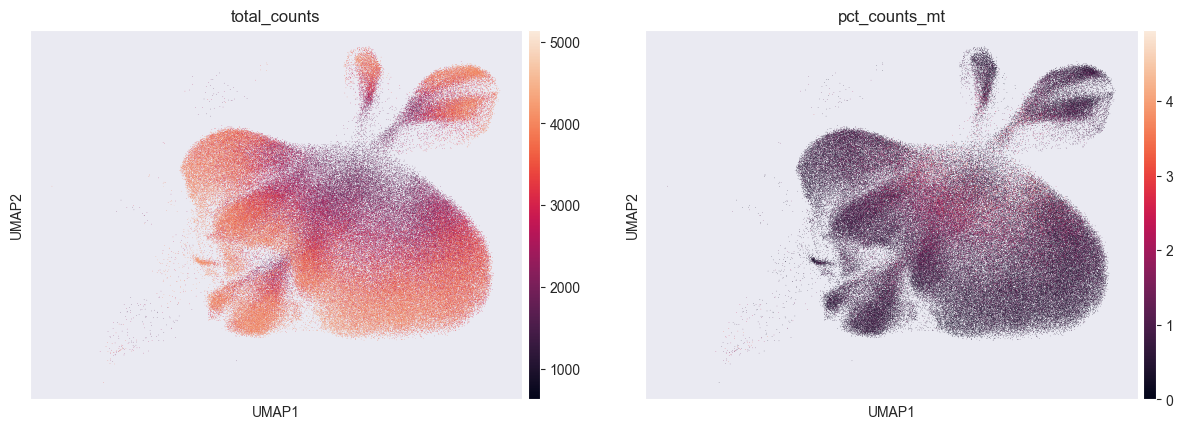

In [7]:
sc.pl.umap(
    adata,
    color=["total_counts", "pct_counts_mt"],
)

In [8]:
adata

AnnData object with n_obs × n_vars = 207990 × 61427
    obs: 'APOE_class', 'Brain.Region', 'SORT', 'Braak.stage', 'Disease.Group', 'Amyloid', 'Brain.weight', 'PMI.hr.', 'Race', 'Age', 'RIN', 'total_counts', 'pct_counts_mt', 'droplet_FDR', 'doublefinder', 'n_genes', 'sample', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'donor_id', 'Age_group', 'PMI_group', 'RIN_group', 'Major_celltypes', 'Author_Annotation', 'NP.Diagonis', 'tissue_type', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'mt', 'ribo', 'hb', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Author_Annotati

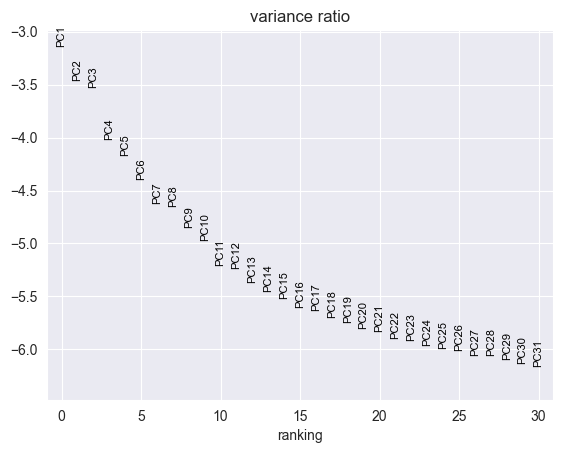

In [9]:
sc.tl.pca(adata, svd_solver='arpack', mask_var = "highly_variable")
sc.pl.pca_variance_ratio(adata, log=True)

In [10]:
adata_hvg = adata[:, adata.var['highly_variable']]
adata_hvg.var_names = adata_hvg.var["feature_name"]

/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/anndata/_core/anndata.py:854: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['ENSG00000284694', 'ENSG00000230021', 'MTCYBP45', 'CA6', 'CHD5']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [11]:
sc.pp.neighbors(adata_hvg, n_pcs=25)
sc.tl.umap(adata_hvg)

/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
sc.tl.leiden(adata_hvg, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata_hvg, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata_hvg, key_added="leiden_res1", resolution=1.0)

/var/folders/m0/5342p_s55313vrcn64gwp8t80000gn/T/ipykernel_17738/2803219699.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_hvg, key_added="leiden_res0_25", resolution=0.25)


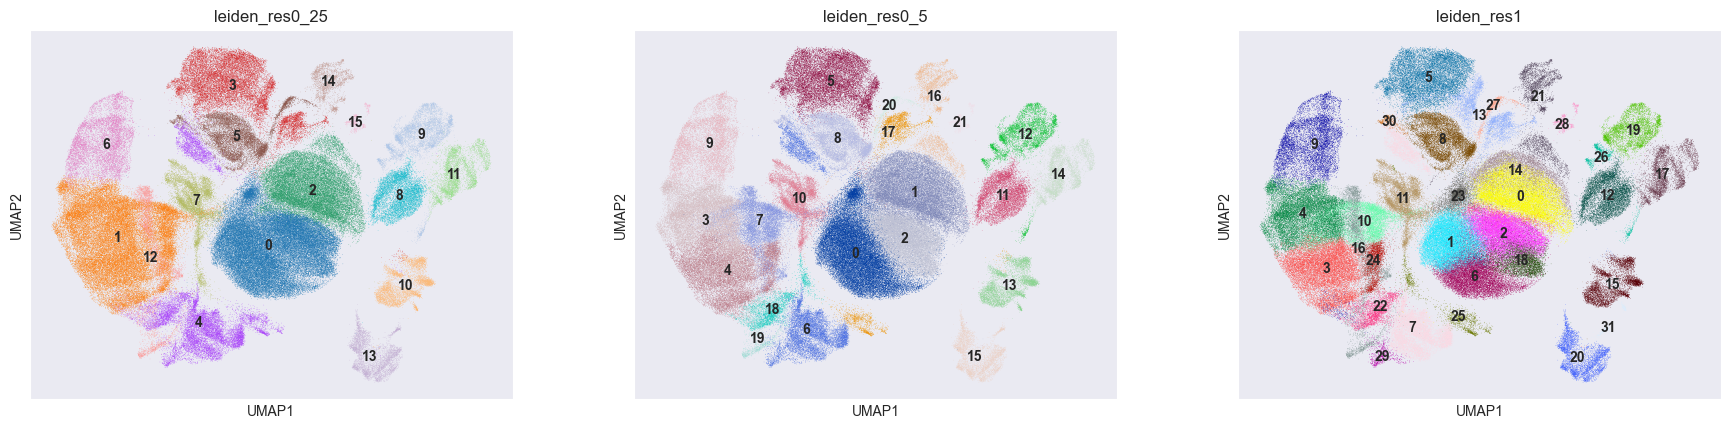

In [13]:
sc.pl.umap(
    adata_hvg,
    color=["leiden_res0_25", "leiden_res0_5", "leiden_res1"],
    legend_loc="on data",
)

In [14]:
sc.tl.rank_genes_groups(adata_hvg, 'leiden_res0_5', method='wilcoxon', pts=True)

/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/l

In [31]:
adata_hvg.write("data/dataset_diseased_glutamatergic_latest_state.h5ad")

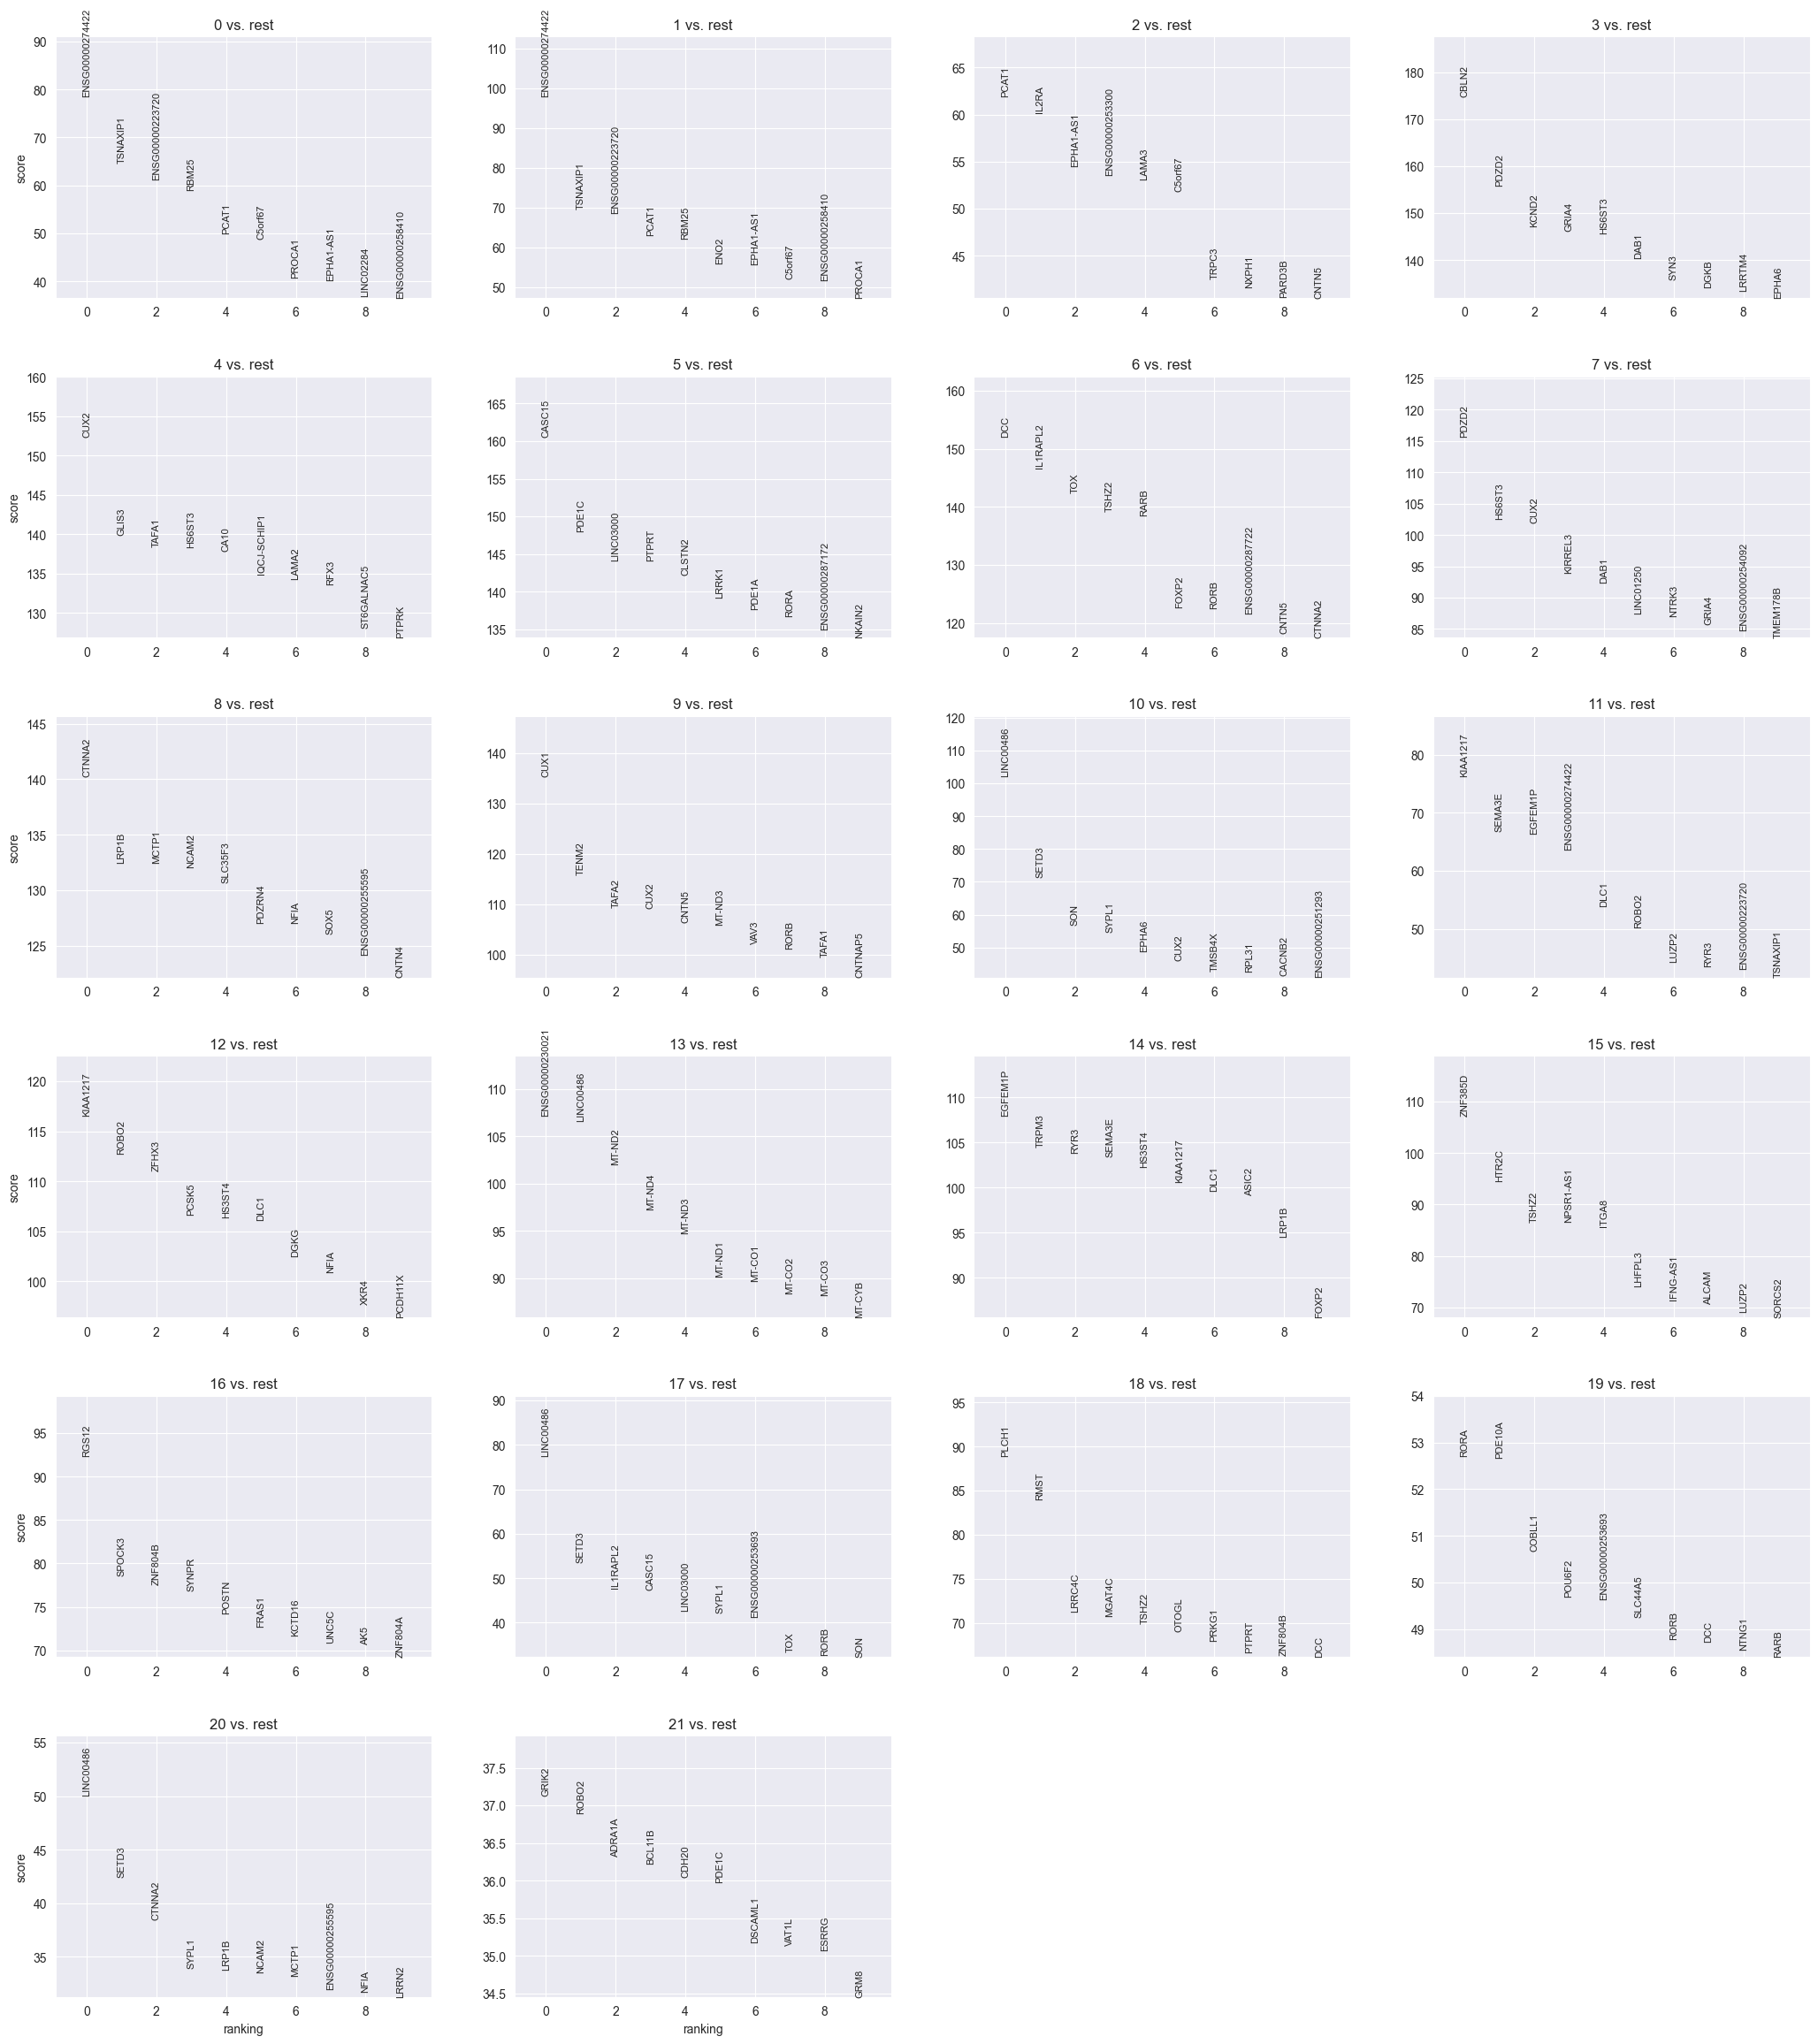

In [32]:
sc.pl.rank_genes_groups(adata_hvg, n_genes=10, sharey=False, gene_symbols="feature_name")

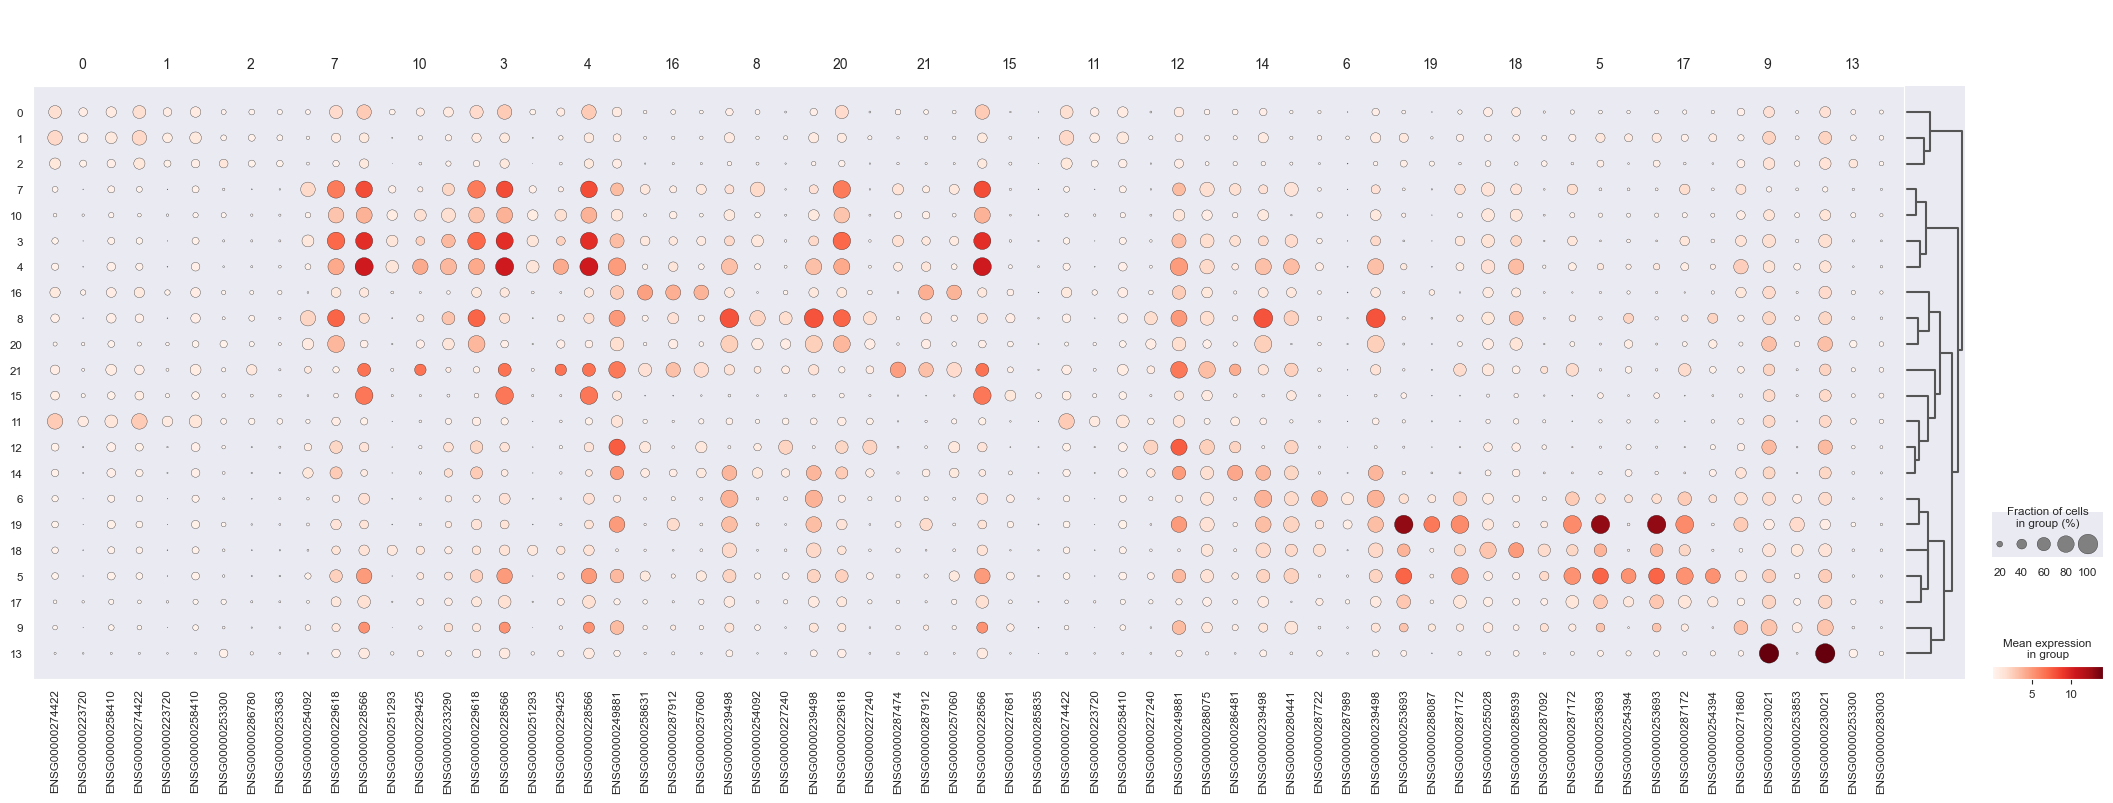

In [36]:
sc.pl.rank_genes_groups_dotplot(adata_hvg, n_genes=3, gene_symbols="feature_name")

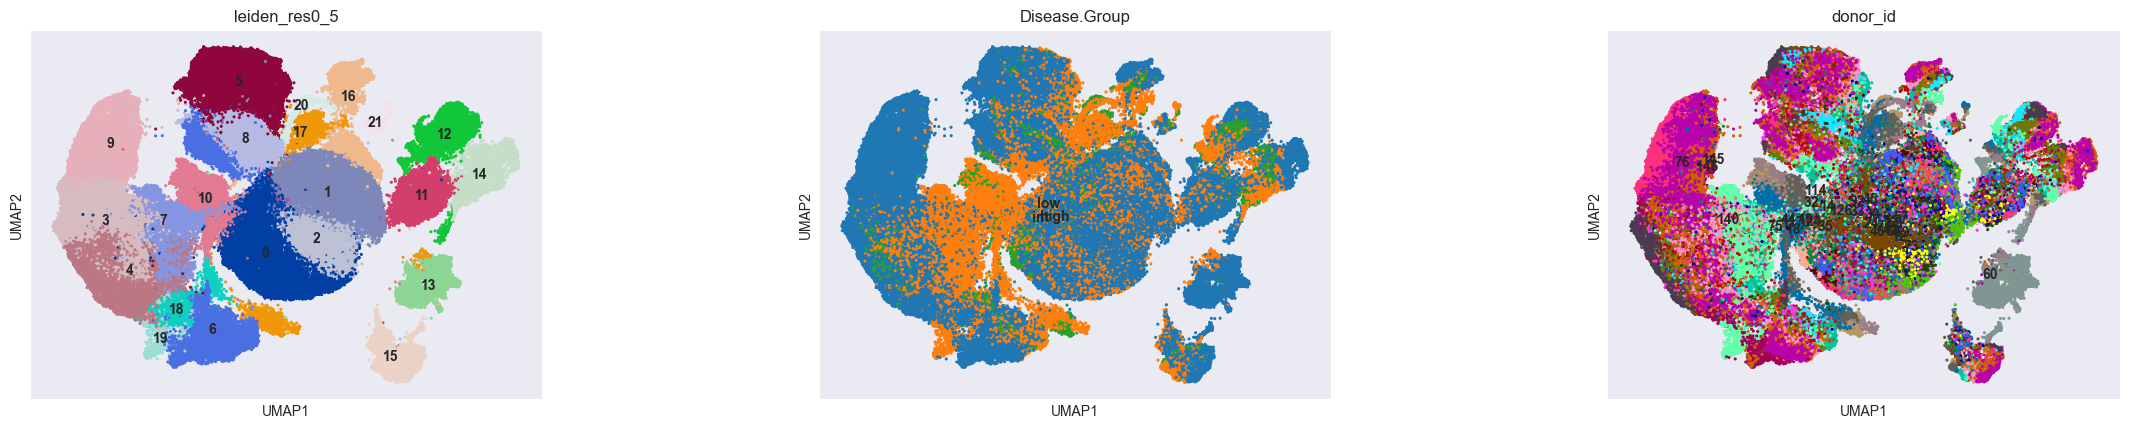

In [18]:
sc.pl.umap(adata_hvg, color=['leiden_res0_5', "Disease.Group", "donor_id"], wspace=0.4, size=20, legend_loc="on data")

In [41]:
adata_hvg.obs_keys()

['APOE_class',
 'Brain.Region',
 'SORT',
 'Braak.stage',
 'Disease.Group',
 'Amyloid',
 'Brain.weight',
 'PMI.hr.',
 'Race',
 'Age',
 'RIN',
 'total_counts',
 'pct_counts_mt',
 'droplet_FDR',
 'doublefinder',
 'n_genes',
 'sample',
 'tissue_ontology_term_id',
 'assay_ontology_term_id',
 'cell_type_ontology_term_id',
 'development_stage_ontology_term_id',
 'self_reported_ethnicity_ontology_term_id',
 'disease_ontology_term_id',
 'sex_ontology_term_id',
 'is_primary_data',
 'suspension_type',
 'donor_id',
 'Age_group',
 'PMI_group',
 'RIN_group',
 'Major_celltypes',
 'Author_Annotation',
 'NP.Diagonis',
 'tissue_type',
 'cell_type',
 'assay',
 'disease',
 'sex',
 'tissue',
 'self_reported_ethnicity',
 'development_stage',
 'observation_joinid',
 'leiden_res0_25',
 'leiden_res0_5',
 'leiden_res1']

In [49]:
adata_hvg.obs["Brain.Region"].value_counts()

Brain.Region
Frontal Cx (BA9)            127440
Primary Visual Cx (BA17)     42114
Precuneous (BA7)             38436
Name: count, dtype: int64

In [69]:
BA9 = adata_hvg.obs[adata_hvg.obs["Brain.Region"] == "Frontal Cx (BA9)"]
BA9["leiden_res1"].value_counts(normalize=True)

leiden_res1
3     0.093275
0     0.078484
6     0.071257
1     0.068754
5     0.062814
7     0.060962
11    0.056474
10    0.055069
8     0.054614
4     0.045959
15    0.039438
13    0.034000
14    0.033898
12    0.031654
19    0.029763
17    0.026640
22    0.026350
20    0.024882
24    0.021720
21    0.020818
23    0.020253
25    0.013402
26    0.008106
27    0.008004
28    0.005085
18    0.003045
31    0.002731
2     0.001962
16    0.000565
9     0.000024
29    0.000000
30    0.000000
Name: proportion, dtype: float64

In [68]:
BA17 = adata_hvg.obs[adata_hvg.obs["Brain.Region"] == "Primary Visual Cx (BA17)"]
BA17["leiden_res1"].value_counts(normalize=True)

leiden_res1
2     0.335280
9     0.181816
18    0.092392
0     0.090991
1     0.078240
12    0.054305
4     0.047395
5     0.023626
6     0.018687
21    0.015458
17    0.015339
30    0.009640
23    0.008976
7     0.006292
14    0.005746
19    0.005105
20    0.004963
8     0.001638
22    0.000689
13    0.000665
29    0.000617
28    0.000546
10    0.000499
16    0.000427
3     0.000237
11    0.000190
26    0.000071
15    0.000071
27    0.000047
24    0.000024
25    0.000024
31    0.000000
Name: proportion, dtype: float64